In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix




In [159]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [160]:
df=pd.read_csv("TaxiFare.csv")
df.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [162]:
df.isnull().sum() #in the dataset there are no missing values

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [163]:
#to standarize the data
scaler = StandardScaler()
df[['latitude_of_pickup', 'longitude_of_pickup', 'latitude_of_dropoff', 'longitude_of_dropoff']] = scaler.fit_transform(
    df[['latitude_of_pickup', 'longitude_of_pickup', 'latitude_of_dropoff', 'longitude_of_dropoff']])


In [164]:
df = df[df['amount'] > 0]
X = df[['latitude_of_pickup', 'longitude_of_pickup', 'latitude_of_dropoff', 'longitude_of_dropoff']]
y = df['amount']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [166]:
#linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [167]:
#decisionn tree regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [168]:
#random forest regressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [169]:
model1 = GradientBoostingRegressor()
model1.fit(X_train, y_train)

GradientBoostingRegressor()

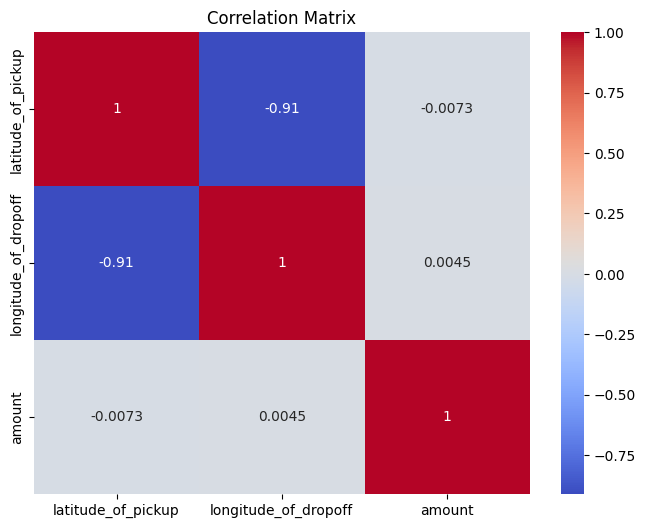

In [170]:
#correaltion matrix
d1 = pd.DataFrame(X, columns=['latitude_of_pickup', 'longitude_of_dropoff'])
d1['amount'] = y
correlation_matrix = d1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

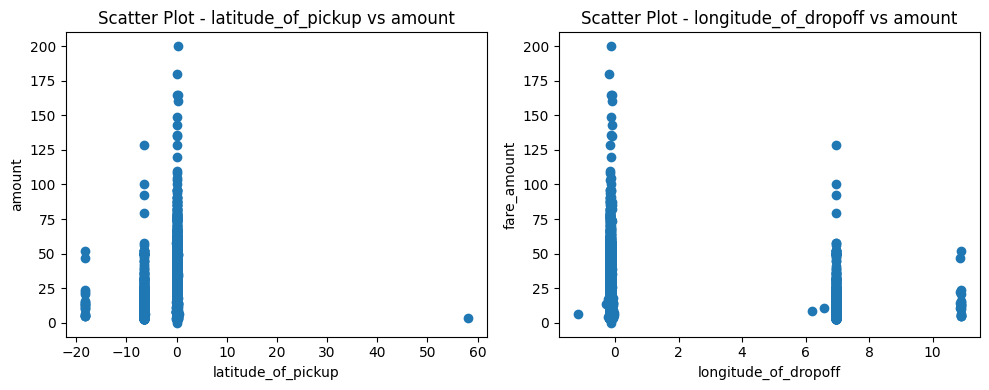

In [171]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(d1['latitude_of_pickup'], d1['amount'])
plt.xlabel('latitude_of_pickup')
plt.ylabel('amount')
plt.title('Scatter Plot - latitude_of_pickup vs amount')
plt.subplot(1, 2, 2)
plt.scatter(d1['longitude_of_dropoff'], d1['amount'])
plt.xlabel('longitude_of_dropoff')
plt.ylabel('fare_amount')
plt.title('Scatter Plot - longitude_of_dropoff vs amount')
plt.tight_layout()
plt.show()

Linear Regression Root mean squared: 9.851770392569863
Linear Regression R-squared Score: -0.000334716474163832


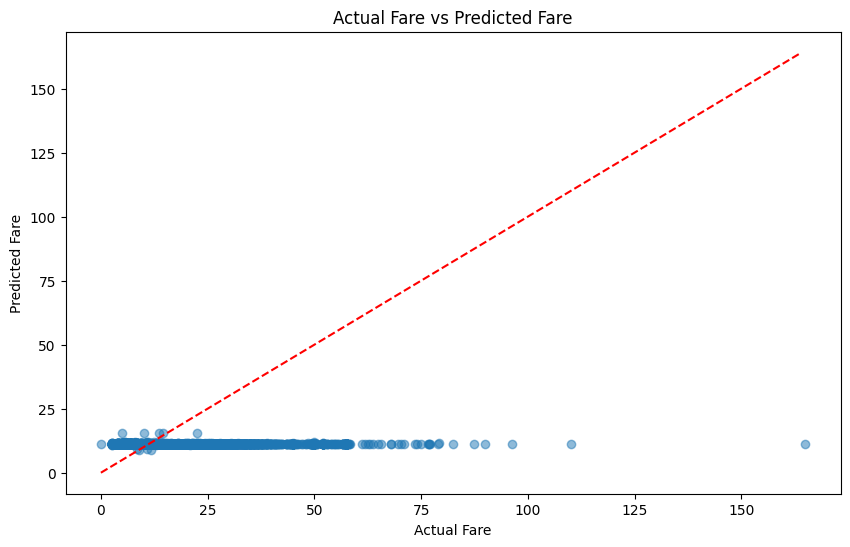

In [188]:
#train the model
model = LinearRegression()
model.fit(X_train, y_train)
l_pred = model.predict(X_test)
l_pred = [max(0, fare) for fare in l_pred]
l_rmse = mean_squared_error(y_test, l_pred, squared=False)
l_r2 = r2_score(y_test, l_pred)
print(f"Linear Regression Root mean squared: {l_rmse}")
print(f"Linear Regression R-squared Score: {l_r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, l_pred, alpha=0.5)
plt.plot(np.arange(0, max(y_test), 1), np.arange(0, max(y_test), 1), color='red', linestyle='--')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual Fare vs Predicted Fare')
plt.show()

[4.5, 9.3, 17.5, 6.9, 7.5, 6.1, 4.5, 8.5, 9.3, 4.9, 5.7, 11.473406593406597, 13.7, 7.5, 8.1, 20.5, 5.7, 9.0, 49.8, 40.1, 7.7, 15.5, 4.9, 14.5, 8.0, 17.5, 7.7, 14.5, 13.3, 9.5, 8.5, 14.5, 16.0, 6.1, 24.0, 6.9, 5.5, 31.83, 12.5, 9.0, 10.1, 13.3, 8.1, 26.0, 15.0, 12.0, 14.1, 5.0, 4.9, 16.0, 5.3, 4.9, 32.33, 4.5, 5.7, 6.5, 4.9, 8.0, 9.0, 15.5, 6.0, 9.0, 5.7, 9.3, 8.1, 6.9, 11.473406593406597, 4.5, 7.7, 5.7, 4.9, 11.5, 10.1, 11.473406593406597, 5.5, 11.473406593406597, 3.3, 5.0, 3.7, 20.0, 11.0, 7.7, 7.0, 3.7, 27.7, 24.5, 5.7, 26.5, 9.5, 7.3, 4.9, 10.5, 37.33, 11.3, 6.5, 7.5, 5.3, 7.5, 20.33, 7.7, 7.5, 6.0, 6.9, 4.5, 10.9, 5.7, 6.1, 7.0, 5.3, 10.5, 11.0, 13.3, 3.3, 11.7, 10.0, 7.3, 9.0, 4.5, 6.1, 4.0, 17.0, 4.5, 22.5, 23.0, 4.9, 9.0, 26.1, 26.1, 12.9, 3.7000000000000006, 11.3, 4.1, 12.1, 7.5, 22.0, 7.7, 10.5, 5.5, 12.5, 9.5, 8.5, 9.7, 10.5, 7.0, 14.1, 8.0, 18.5, 5.5, 9.5, 4.0, 7.7, 8.1, 6.0, 18.0, 6.0, 3.7, 21.5, 5.3, 11.0, 13.3, 3.3, 3.0, 4.1, 4.9, 10.1, 9.5, 11.0, 11.5, 57.33, 8.5, 5.3, 3

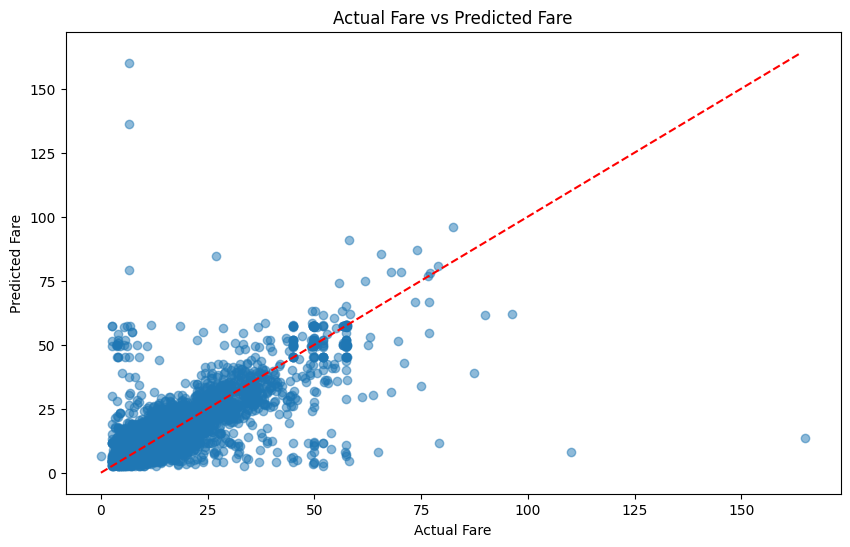

In [187]:
#decision tree model
dt_pred = decision_tree_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)
dt_r2 = r2_score(y_test, dt_pred)
p=dt_pred.tolist()
print(p)
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Decison Tree  Regression R-squared  Score: {dt_r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_pred, alpha=0.5)
plt.plot(np.arange(0, max(y_test), 1), np.arange(0, max(y_test), 1), color='red', linestyle='--')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual Fare vs Predicted Fare')
plt.show()

[4.334999999999999, 5.504000000000001, 10.860000000000003, 6.313999999999997, 6.849999999999998, 6.759000000000002, 6.822, 7.9590000000000005, 11.874999999999995, 7.293999999999998, 5.528000000000003, 11.469365553482321, 18.393, 6.948000000000002, 7.943000000000001, 23.495, 6.394000000000003, 10.740999999999996, 51.39520000000006, 49.38040000000001, 6.842, 12.828, 5.689999999999997, 12.669, 7.5729999999999995, 14.926000000000004, 8.324, 18.144, 12.957999999999997, 9.997, 8.096999999999998, 15.167, 8.485, 8.108000000000002, 23.726599999999994, 5.9520000000000035, 5.146, 33.503299999999975, 11.647, 7.510999999999996, 12.153000000000002, 11.239000000000003, 11.252999999999997, 17.054699999999993, 14.489, 8.423000000000004, 13.794, 4.315000000000005, 5.104000000000003, 19.343999999999998, 5.691, 9.568999999999996, 33.792, 5.0550000000000015, 6.521, 6.811000000000002, 5.809999999999998, 7.419999999999998, 9.288000000000004, 11.029999999999996, 5.397, 9.998000000000001, 6.211000000000005, 13

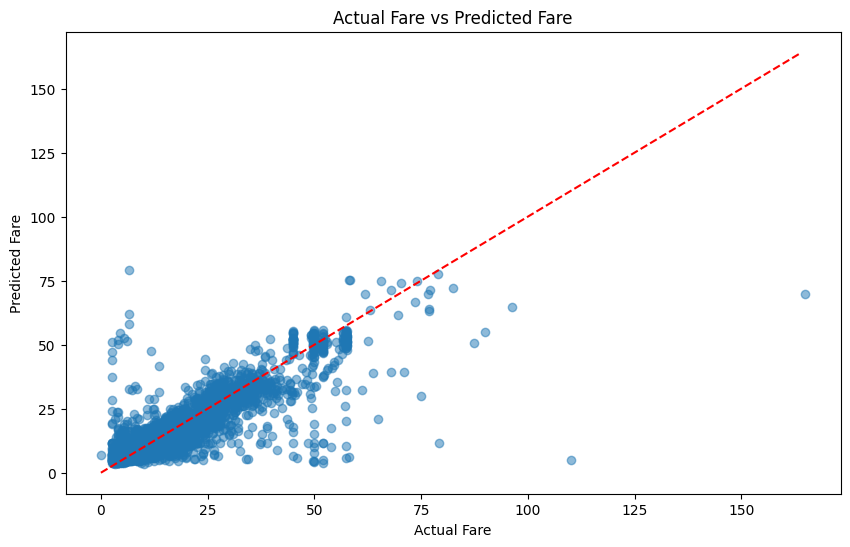

In [181]:
#random forest model
rf_pred = random_forest_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)
q=rf_pred.tolist()
print(q)
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest Regression R-squared  Score: {rf_r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot(np.arange(0, max(y_test), 1), np.arange(0, max(y_test), 1), color='red', linestyle='--')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual Fare vs Predicted Fare')
plt.show()

[11.322399047857685, 11.327800935521468, 11.324314821046544, 11.326137185382494, 11.322667952648178, 11.324807059626501, 11.322707955806582, 11.326950990618943, 11.323506718520829, 11.325988646739743, 11.32777062923337, 11.72125617051859, 11.323564099267072, 11.324382314184678, 11.323465378835468, 11.330360919834517, 11.323982051906567, 11.328796666244711, 11.327044430579631, 11.324528800710937, 11.322541869992625, 11.327379098470928, 11.322168559410978, 11.324660425414637, 11.323845030384323, 11.322446342870716, 11.325762794521953, 11.326118963923529, 11.324877355551015, 11.326701382203328, 11.324609431708392, 11.324661926274178, 11.323749781547487, 11.328526689658613, 11.318862449035805, 11.322925401423612, 11.326424145424262, 11.318319022985719, 11.32593255899739, 11.322458030475424, 11.323622422474783, 11.326434748657942, 11.32319397476318, 11.323156317929763, 11.327589962379776, 11.322898048233341, 11.32303098956738, 11.322991872515988, 11.323492408598096, 11.327925792979798, 11.3

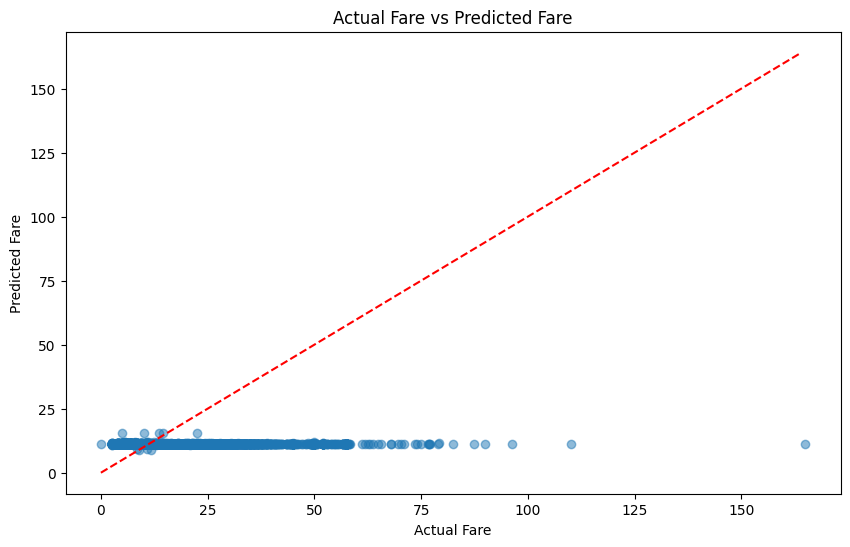

In [182]:
#Gradient Boosting Regression model
gb_pred = model.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
gb_r2 = r2_score(y_test, gb_pred)
j= gb_pred.tolist()
print(j)
print(f"Gradient Boosting RMSE: {gb_rmse}")
print(f"Gradient Boosting Regression R-squared  Score: {gb_r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_pred, alpha=0.5)
plt.plot(np.arange(0, max(y_test), 1), np.arange(0, max(y_test), 1), color='red', linestyle='--')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual Fare vs Predicted Fare')
plt.show()

In [176]:
#input given / predefined input
latitude_of_pickup = 40.111111
longitude_of_pickup= 89.2333
latitude_of_dropoff= 65.988
longitude_of_dropoff = 92.5678



In [177]:
#uncomment/remove comments from these lines---- if user input is needed
'''latitude_of_pickup = float(input("Enter the pickup latitude: "))
longitude_of_pickup= float(input("Enter the pickup longitude: "))
latitude_of_dropoff= float(input("Enter the dropoff latitude: "))
longitude_of_dropoff = float(input("Enter the dropoff longitude: "))'''


'latitude_of_pickup = float(input("Enter the pickup latitude: "))\nlongitude_of_pickup= float(input("Enter the pickup longitude: "))\nlatitude_of_dropoff= float(input("Enter the dropoff latitude: "))\nlongitude_of_dropoff = float(input("Enter the dropoff longitude: "))'

In [178]:
input_data = pd.DataFrame({
    'latitude_of_pickup': [latitude_of_pickup],
    'longitude_of_pickup': [longitude_of_pickup],
    'latitude_of_dropoff': [latitude_of_dropoff],
    'longitude_of_dropoff': [longitude_of_dropoff]
})

In [179]:
from sklearn.feature_selection import SelectKBest, f_regression
linear_prediction = model.predict(input_data)
decision_tree_prediction = decision_tree_model.predict(input_data)
random_forest_prediction = random_forest_model.predict(input_data)
Gradient_Boosting_prediction = model1.predict(input_data)

print(f"Linear Regression Fare Prediction: ${linear_prediction[0]}")
print(f"Decision Tree Fare Prediction: ${decision_tree_prediction[0]}")
print(f"Random Forest Fare Prediction: ${random_forest_prediction[0]}")
print(f"Gradient Boosting Fare Prediction: ${Gradient_Boosting_prediction[0]}")

a=linear_prediction[0]
b=decision_tree_prediction[0]
c=random_forest_prediction[0]
d=Gradient_Boosting_prediction[0]
numbers = [a, b, c, d]
positive_numbers = [num for num in numbers if num > 0]
min_positive = min(positive_numbers)
print("the cost effective path is ",min_positive)

Linear Regression Fare Prediction: $-43.09880000528837
Decision Tree Fare Prediction: $24.0
Random Forest Fare Prediction: $16.31611746031746
Gradient Boosting Fare Prediction: $13.42048783002829
the cost effective path is  13.42048783002829
